In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 家電  

## 電気炊飯器

### 時刻別消費電力量
$$
E_{ Elc, rice-cooker, d, t } = ( P_{ Elc, rice-cooker, cook } \times t_{ rice-cooker, cook, d, t } + P_{ Elc, rice-cooker, keep } \times t_{ rice-cooker, keep, d, t }  ) \times 10^{ -3 }
$$

$ E_{ Elc, rice-cooker, d, t } $：日付dの時刻tにおける消費電力量,kWh  
$ P_{ Elc, rice-cooker, cook } $：炊飯時の消費電力,W  
$ t_{ rice-cooker, cook, d, t } $：日付dの時刻tにおける炊飯時間,h  
$ P_{ Elc, rice-cooker, keep } $：保温時の消費電力,W  
$ t_{ rice-cooker, keep, d, t } $：日付dの時刻tにおける保温時間,h  
$ 10^{ -3 } $：単位換算,Wh -> kWh

In [2]:
def get_E_Elc_rice_cooker_d_t(t_rice_cooker_cook, P_Elc_rice_cooker_rtd, N_cup_of_rice, E_Elc_rice_cooker_keep, t_rice_cooker_cook_d_t, t_rice_cooker_keep_d_t ):
    """時刻別消費電力量を計算する
    
    Parameters
    ----------
    t_rice_cooker_cook : float
        炊飯1回当たりの時間(54.19/60), h
    
    P_Elc_rice_cooker_rtd : float
        定格消費電力, W
        
    N_cup_of_rice : float
        炊飯号数, 合
        
    E_Elc_rice_cooker_keep : float
        保温時の消費電力量, Wh
    
    t_rice_cooker_cook_d_t : ndarray(N-dimensional array)
        1年間の全時間の炊飯時間を格納したND配列, h
        d日t時の炊飯時間が年開始時から8760個連続して格納されている

    t_rice_cooker_keep_d_t : ndarray(N-dimensional array)
        1年間の全時間の保温時間を格納したND配列, h
        d日t時の保温時間が年開始時から8760個連続して格納されている
    
    Returns
    ----------
    E_Elc_rice_cooker_d_t : ndarray(N-dimensional array)
        1年間の全時間の消費電力量を格納したND配列, Wh
        d日t時の消費電力量が年開始時から8760個連続して格納されている
    """    
    
    P_Elc_rice_cooker_cook = get_P_Elc_rice_cooker_cook(t_rice_cooker_cook, P_Elc_rice_cooker_rtd, N_cup_of_rice)
    P_Elc_rice_cooker_keep = get_P_Elc_rice_cooker_keep(E_Elc_rice_cooker_keep)
    
    E_Elc_rice_cooker_d_t = P_Elc_rice_cooker_cook * t_rice_cooker_cook_d_t \
                          + P_Elc_rice_cooker_keep * t_rice_cooker_keep_d_t
        
    E_Elc_rice_cooker_d_t = E_Elc_rice_cooker_d_t * 10**(-3)
    
    return E_Elc_rice_cooker_d_t

### 動作別の消費電力

#### 炊飯時の消費電力  
$$
P_{ Elc, rice-cooker, cook } = \frac { E_{ Elc, rice-cooker, cook } } { t_{ Elc, rice-cooker, cook } }
$$
$$
E_{ Elc, rice-cooker, cook } = 0.029 \times P_{ Elc, rice-cooker, rtd } + ( 32.414 \times N_{ cup-of-rice } + 58.745)
$$

$ E_{ Elc, rice-cooker, cook } $：炊飯1回あたりの消費電力量,Wh  
$ t_{ rice-cooker, cook } $：炊飯1回当たりの時間( = $ \frac{ 54.19 }{ 60 } $),h  
$ P_{ Elc, rice-cooker, rtd } $：定格待機電力,W  
$ N_{ cup-of-rice } $：炊飯合数,合

In [3]:
def get_P_Elc_rice_cooker_cook(t_rice_cooker_cook, P_Elc_rice_cooker_rtd, N_cup_of_rice):
    """炊飯時の消費電力を計算する
    
    Parameters
    ----------
    t_rice_cooker_cook : float
        炊飯1回当たりの時間(54.19/60), h
    
    P_Elc_rice_cooker_rtd : float
        定格消費電力, W
        
    N_cup_of_rice : float
        炊飯号数, 合
        
    Returns
    ----------
    P_Elc_rice_cooker_cook  : float
        炊飯時の消費電力, W
    """
    
    
    E_Elc_rice_cooker_cook = 0.029 * P_Elc_rice_cooker_rtd \
                           + ( 32.414 * N_cup_of_rice + 58.745)
    
    # /試算結果_家電の電力消費量.xlsx　に合わせるための処理
    t_rice_cooker_cook = 143.30775 * 60 / E_Elc_rice_cooker_cook
    t_rice_cooker_cook = t_rice_cooker_cook / 60
    # 試算結果_家電の電力消費量.xlsx　に合わせるための処理/
    
    
    P_Elc_rice_cooker_cook = E_Elc_rice_cooker_cook * t_rice_cooker_cook
        
    return P_Elc_rice_cooker_cook

#### 保温時の消費電力  
$$
P_{ Elc, rice-cooker, keep } = \frac { E_{ Elc, rice-cooker, keep } } { 1 }
$$

$ E_{ Elc, rice-cooker, keep } $：保温時の消費電力量,Wh  
$ 1 $：1時間(消費電力量を消費電力に換算するための値),h

In [4]:
def get_P_Elc_rice_cooker_keep(E_Elc_rice_cooker_keep):
    """保温時の消費電力を計算する
    
    Parameters
    ----------
    E_Elc_rice_cooker_keep : float
        保温時の消費電力量, Wh
                
    Returns
    ----------
    P_Elc_rice_cooker_keep : float
        保温時の消費電力, W
    """
    
    P_Elc_rice_cooker_keep = E_Elc_rice_cooker_keep / 1
        
    return P_Elc_rice_cooker_keep

## サンプル計算

### 家電スケジュールの読み込み
ここでは、サンプルデータをcsvファイルから読み込む

In [5]:
def import_schedule_1_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['電気炊飯器_4人世帯_炊飯']
    schedule_1_d_t = ds.values
    return schedule_1_d_t

In [6]:
def import_schedule_2_d_t() -> np.ndarray:
    """家電スケジュールを外部CSVファイルからND配列に読み込む
    
    Returns
    ----------
    E_Elc_tv_led_d_t : ndarray(N-dimensional array)
        1年間の全時間の家電スケジュールを格納したND配列
        d日t時の家電スケジュールが年開始時から8760個連続して格納されている
    """
    
    df = pd.read_csv('HEA_schedule_sample.csv', encoding='SHIFT_JIS')
    ds = df['電気炊飯器_4人世帯_保温']
    schedule_2_d_t = ds.values
    return schedule_2_d_t

#### 炊飯時の消費電力

In [7]:
get_P_Elc_rice_cooker_cook(54.19/60, 1210, 2)

143.30775

#### 保温時の消費電力

In [8]:
get_P_Elc_rice_cooker_keep(15.1)

15.1

### 時刻別消費電力量

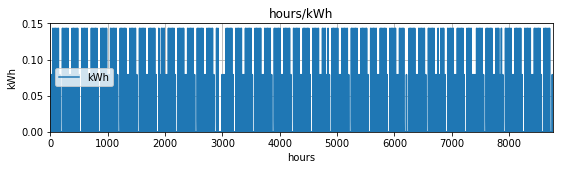

In [9]:
t_rice_cooker_cook_d_t = import_schedule_1_d_t()
t_rice_cooker_keep_d_t = import_schedule_2_d_t()

x = np.arange(8760)
y = get_E_Elc_rice_cooker_d_t(54.19/60, 1210, 2, 15.1, t_rice_cooker_cook_d_t, t_rice_cooker_keep_d_t)

plt.figure(figsize=(9,2))
plt.subplot(1,1,1)
plt.plot(x, y, label="kWh")

plt.grid(True)

plt.title("hours/kWh")
plt.xlabel("hours")
plt.ylabel("kWh")

plt.xlim(0,8760)
plt.ylim(0,)

plt.legend()
plt.show()

### 省エネ基準との比較用時刻別消費電力量の書き出し

In [10]:
t_rice_cooker_cook_d_t = import_schedule_1_d_t()
t_rice_cooker_keep_d_t = import_schedule_2_d_t()

dat = get_E_Elc_rice_cooker_d_t(54.19/60, 1210, 2, 15.1, t_rice_cooker_cook_d_t, t_rice_cooker_keep_d_t)

np.savetxt('tmp.csv',dat,delimiter=',',fmt = " %s ")